<a href="https://colab.research.google.com/github/nthanhkhang/Natural-Language-Processing/blob/main/Sentiment_Vietnamese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thực hiện tiếp các nhiệm vụ sau:

1.   Lựa chọn đặc trưng 1-gram, 2-gram
2.   Convert sang vector với trọng số ở các mode: binary, count, tfidf 
3.   Chia thành tập Train và Test
4. Xây dựng các mô hình học: NB, SVM, Neural Network
5. Chọn mô hình tốt nhất và viết hàm dự đoán sentiment của một câu đưa vào


In [98]:
import pandas as pd
import nltk 
import numpy as np

In [99]:
!wget https://raw.githubusercontent.com/nthanhkhang/Natural-Language-Processing/main/Lecture%204%20Text%20classification/data/sentimentVN.csv

--2021-01-25 13:55:54--  https://raw.githubusercontent.com/nthanhkhang/Natural-Language-Processing/main/Lecture%204%20Text%20classification/data/sentimentVN.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2106051 (2.0M) [text/plain]
Saving to: ‘sentimentVN.csv.3’

sentimentVN.csv.3   100%[===================>]   2.01M  --.-KB/s    in 0.07s   

2021-01-25 13:55:54 (27.3 MB/s) - ‘sentimentVN.csv.3’ saved [2106051/2106051]



In [100]:
filename = 'sentimentVN.csv'
df = pd.read_csv(filename)
print(df.head(5))
print(df.shape)

                       comment label  Unnamed: 2 Unnamed: 3
0               Áo bao đẹp ạ!!   POS         NaN        NaN
1                  Tuyệt vời !   POS         NaN        NaN
2   2day ao khong giong trong.   NEG         NaN        NaN
3  Mùi thơm,bôi lên da mềm da.   POS         NaN        NaN
4            Vải đẹp, dày dặn.   POS         NaN        NaN
(31460, 4)


In [101]:
from collections import Counter 
counter = Counter()
labels = df['label']
reviews = df.values[:,1] 
counter.update(labels)
print(counter)
print(reviews[:5])

Counter({'POS': 20093, 'NEG': 6669, 'NEU': 4698})
['POS' 'POS' 'NEG' 'POS' 'POS']


<BarContainer object of 3 artists>

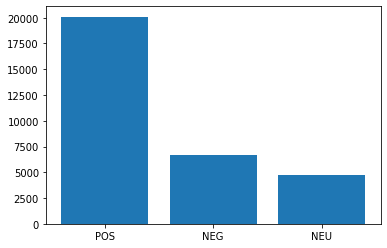

In [102]:
import matplotlib.pyplot as plt
plt.bar(counter.keys(),counter.values())

In [103]:
data = df.values
print(data.shape)

(31460, 4)


In [104]:
print(data[:10])

[['Áo bao đẹp ạ!!' 'POS' nan nan]
 ['Tuyệt vời !' 'POS' nan nan]
 ['2day ao khong giong trong.' 'NEG' nan nan]
 ['Mùi thơm,bôi lên da mềm da.' 'POS' nan nan]
 ['Vải đẹp, dày dặn.' 'POS' nan nan]
 ['Hàng rất đẹp, rất chi là ưng ý.' 'POS' nan nan]
 ['Chất lượng sản phẩm tốt, date dài.' 'POS' nan nan]
 ['Ăn nói và thái độ phục vụ tốt.' 'POS' nan nan]
 ['Đóng gói sản phẩm chắc chắn.' 'POS' nan nan]
 ['tất sờn hết ca chưa dùng mà vay r.' 'NEG' nan nan]]


In [105]:
lines = data[:,0]
labels = data[:,1]
print(lines[:5])
print(labels[:5])

['Áo bao đẹp ạ!!' 'Tuyệt vời !' '2day ao khong giong trong.'
 'Mùi thơm,bôi lên da mềm da.' 'Vải đẹp, dày dặn.']
['POS' 'POS' 'NEG' 'POS' 'POS']


# Lựa chọn đặc trưng 1-gram, 2-gram

In [106]:
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
def remove_stop_words(words):
    result = [i for i in words if i not in stopwords.words('english')]
    return result

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [107]:
# lấy 2 gram 
bigram_dict={}
for sent in lines:
    words = nltk.word_tokenize(sent)
    for i in range(len(words)):
        if i==0:
            gram='<s>_'+words[i]
        else:
            gram=words[i-1]+'_'+words[i]
        if gram in bigram_dict.keys():
            bigram_dict[gram] += 1
        else:
            bigram_dict[gram] = 1
print(bigram_dict)
remove_stop_words(bigram_dict)

{'<s>_Áo': 2219, 'Áo_bao': 4, 'bao_đẹp': 22, 'đẹp_ạ': 58, 'ạ_!': 46, '!_!': 515, '<s>_Tuyệt': 56, 'Tuyệt_vời': 44, 'vời_!': 44, '<s>_2day': 1, '2day_ao': 1, 'ao_khong': 1, 'khong_giong': 5, 'giong_trong': 3, 'trong_.': 18, '<s>_Mùi': 44, 'Mùi_thơm': 10, 'thơm_,': 14, ',_bôi': 1, 'bôi_lên': 1, 'lên_da': 3, 'da_mềm': 10, 'mềm_da': 1, 'da_.': 18, '<s>_Vải': 825, 'Vải_đẹp': 166, 'đẹp_,': 1318, ',_dày': 45, 'dày_dặn': 295, 'dặn_.': 61, '<s>_Hàng': 1069, 'Hàng_rất': 67, 'rất_đẹp': 3193, ',_rất': 221, 'rất_chi': 4, 'chi_là': 5, 'là_ưng': 40, 'ưng_ý': 279, 'ý_.': 202, '<s>_Chất': 4973, 'Chất_lượng': 5258, 'lượng_sản': 4864, 'sản_phẩm': 8423, 'phẩm_tốt': 351, 'tốt_,': 541, ',_date': 7, 'date_dài': 4, 'dài_.': 222, '<s>_Ăn': 12, 'Ăn_nói': 1, 'nói_và': 1, 'và_thái': 7, 'thái_độ': 49, 'độ_phục': 27, 'phục_vụ': 2477, 'vụ_tốt': 110, 'tốt_.': 1075, '<s>_Đóng': 1285, 'Đóng_gói': 3207, 'gói_sản': 3081, 'phẩm_chắc': 236, 'chắc_chắn': 3025, 'chắn_.': 928, '<s>_tất': 4, 'tất_sờn': 1, 'sờn_hết': 1, 'hết_ca

['<s>_Áo',
 'Áo_bao',
 'bao_đẹp',
 'đẹp_ạ',
 'ạ_!',
 '!_!',
 '<s>_Tuyệt',
 'Tuyệt_vời',
 'vời_!',
 '<s>_2day',
 '2day_ao',
 'ao_khong',
 'khong_giong',
 'giong_trong',
 'trong_.',
 '<s>_Mùi',
 'Mùi_thơm',
 'thơm_,',
 ',_bôi',
 'bôi_lên',
 'lên_da',
 'da_mềm',
 'mềm_da',
 'da_.',
 '<s>_Vải',
 'Vải_đẹp',
 'đẹp_,',
 ',_dày',
 'dày_dặn',
 'dặn_.',
 '<s>_Hàng',
 'Hàng_rất',
 'rất_đẹp',
 ',_rất',
 'rất_chi',
 'chi_là',
 'là_ưng',
 'ưng_ý',
 'ý_.',
 '<s>_Chất',
 'Chất_lượng',
 'lượng_sản',
 'sản_phẩm',
 'phẩm_tốt',
 'tốt_,',
 ',_date',
 'date_dài',
 'dài_.',
 '<s>_Ăn',
 'Ăn_nói',
 'nói_và',
 'và_thái',
 'thái_độ',
 'độ_phục',
 'phục_vụ',
 'vụ_tốt',
 'tốt_.',
 '<s>_Đóng',
 'Đóng_gói',
 'gói_sản',
 'phẩm_chắc',
 'chắc_chắn',
 'chắn_.',
 '<s>_tất',
 'tất_sờn',
 'sờn_hết',
 'hết_ca',
 'ca_chưa',
 'chưa_dùng',
 'dùng_mà',
 'mà_vay',
 'vay_r',
 'r_.',
 '<s>_Shop',
 'Shop_phục',
 'vụ_rất',
 'rất_tốt',
 '<s>_Mặc',
 'Mặc_thì',
 'thì_cũng',
 'cũng_đc',
 'đc_.',
 'Chất_vải',
 'vải_khỏi',
 'khỏi_chê',
 '

In [108]:
# lấy 1 gram 
sentences = [nltk.word_tokenize(sent) for sent in lines]
print(sentences[0])
remove_stop_words(sentences)

['Áo', 'bao', 'đẹp', 'ạ', '!', '!']


[['Áo', 'bao', 'đẹp', 'ạ', '!', '!'],
 ['Tuyệt', 'vời', '!'],
 ['2day', 'ao', 'khong', 'giong', 'trong', '.'],
 ['Mùi', 'thơm', ',', 'bôi', 'lên', 'da', 'mềm', 'da', '.'],
 ['Vải', 'đẹp', ',', 'dày', 'dặn', '.'],
 ['Hàng', 'rất', 'đẹp', ',', 'rất', 'chi', 'là', 'ưng', 'ý', '.'],
 ['Chất', 'lượng', 'sản', 'phẩm', 'tốt', ',', 'date', 'dài', '.'],
 ['Ăn', 'nói', 'và', 'thái', 'độ', 'phục', 'vụ', 'tốt', '.'],
 ['Đóng', 'gói', 'sản', 'phẩm', 'chắc', 'chắn', '.'],
 ['tất', 'sờn', 'hết', 'ca', 'chưa', 'dùng', 'mà', 'vay', 'r', '.'],
 ['Shop', 'phục', 'vụ', 'rất', 'tốt', '.'],
 ['Mặc', 'thì', 'cũng', 'đc', '.'],
 ['Chất', 'vải', 'khỏi', 'chê', '.'],
 ['Thời', 'gian', 'giao', 'hàng', 'rất', 'nhanh', '.'],
 ['Chất', 'lượng', 'sản', 'phẩm', 'tuyệt', 'vời', '.'],
 ['vải', 'hơi', 'thô', 'cứng', 'Thời', 'gian', 'giao', 'hàng', 'nhanh', '.'],
 ['Chất', 'lượng', 'sp', 'chưa', 'thật', 'sự', 'đẹp', 'nhe', 'shop', '!'],
 ['Rất', 'đáng', 'tiền', 'Thời', 'gian', 'giao', 'hàng', 'rất', 'nhanh', '.'],
 ['Quầ

In [109]:
from keras.preprocessing.text import Tokenizer 
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

# Convert sang vector với trọng số ở các mode: binary, count, tfidf 

In [110]:
X = tokenizer.texts_to_matrix(sentences,mode='binary')
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [111]:
X = tokenizer.texts_to_matrix(sentences,mode='count')
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [112]:
X = tokenizer.texts_to_matrix(sentences,mode='tfidf')
print(X)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.72303981 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.72303981 0.         ... 0.         0.         0.        ]
 [0.         0.72303981 0.         ... 0.         0.         0.        ]
 [0.         0.         1.62883947 ... 0.         0.         0.        ]]


# Chia thành tập Train và Test

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=0)

# Xây dựng các mô hình học: NB, SVM, Neural Network

In [114]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
GaussianNB = GaussianNB()
GaussianNB.fit(X_train, y_train)

y_pred = GaussianNB.predict(X_test)


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

         NEG       0.40      0.18      0.25      1290
         NEU       0.15      0.84      0.26       946
         POS       0.78      0.10      0.18      4056

    accuracy                           0.23      6292
   macro avg       0.44      0.37      0.23      6292
weighted avg       0.61      0.23      0.21      6292

[[ 231  992   67]
 [ 101  796   49]
 [ 251 3394  411]]
accuracy is 0.22854418308963764


In [116]:
#MultinomialNB   
from sklearn.naive_bayes import MultinomialNB   
model_NB = MultinomialNB()
model_NB = model_NB.fit(X_train,y_train)
y_pred = model_NB.predict(X_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

         NEG       0.61      0.63      0.62      1290
         NEU       0.31      0.45      0.37       946
         POS       0.90      0.79      0.84      4056

    accuracy                           0.71      6292
   macro avg       0.61      0.62      0.61      6292
weighted avg       0.75      0.71      0.72      6292

[[ 816  349  125]
 [ 271  427  248]
 [ 245  604 3207]]
accuracy is 0.7072472981563891


In [124]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression  
model_LR = LogisticRegression()
model_LR = model_LR.fit(X_train,y_train)
y_pred = model_LR.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

         NEG       0.67      0.69      0.68      1290
         NEU       0.35      0.26      0.30       946
         POS       0.85      0.90      0.88      4056

    accuracy                           0.76      6292
   macro avg       0.63      0.62      0.62      6292
weighted avg       0.74      0.76      0.75      6292

[[ 886  212  192]
 [ 268  248  430]
 [ 164  245 3647]]
accuracy is 0.7598537825810553


In [115]:
# Support Vector Machine's 
from sklearn.linear_model import SGDClassifier

SVC = SGDClassifier()
SVC.fit(X_train, y_train)

y_pred = SVC.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

         NEG       0.65      0.72      0.68      1290
         NEU       0.35      0.21      0.27       946
         POS       0.86      0.91      0.88      4056

    accuracy                           0.76      6292
   macro avg       0.62      0.61      0.61      6292
weighted avg       0.74      0.76      0.75      6292

[[ 926  171  193]
 [ 320  201  425]
 [ 185  198 3673]]
accuracy is 0.7628734901462174


# Chọn mô hình tốt nhất và viết hàm dự đoán sentiment của một câu đưa vào

In [126]:
input_sent = 'tôi rất là vui' 
tokens = nltk.word_tokenize(input_sent)
print(tokens)
X_input = tokenizer.texts_to_matrix([tokens],mode='binary')
print(X_input)

['tôi', 'rất', 'là', 'vui']
[[0. 0. 1. ... 0. 0. 0.]]


In [127]:
y_pred = model_NB.predict(X_input)
print("",input_sent,':',y_pred)

 tôi rất là vui : ['POS']
